In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
%matplotlib inline

Load the Facebook data and show the header

In [41]:
# We need to convert date column to timestamp in timeserie analysis 
facebook_df = pd.read_csv('FB_data.csv',parse_dates=['Date'])

facebook_df.head()
type(facebook_df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
By plotting the difference between the Adjusted volume and the Volume, we see that the Adj columns are redundant.
# So deleting the Adj columns from the facebook dataframe

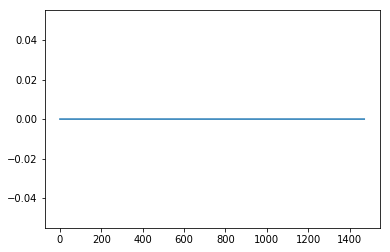

In [42]:
# quick way to check that before deleting 
(facebook_df['Volume'] - facebook_df['Adj. Volume']).plot();

In [43]:
# Here we check if there are multiple values for Split Ratio" None so we can remove the column as well
facebook_df['Split Ratio'].unique()

array([1.])

In [ ]:
# Removing column
#list_drop = ['City', 'State']
#ufo.drop(list_drop, axis=1, inplace=True)

In [28]:

# do this once list_to_drop = ["Split Ratio","Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]
#facebook_df.drop(list_to_drop,axis=1,inplace=True)

In [44]:
facebook_df.head()
# this too once only 
facebook_df.set_index('Date',inplace=True)

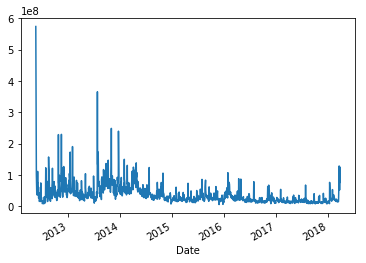

In [45]:
facebook_df['Volume'].plot();

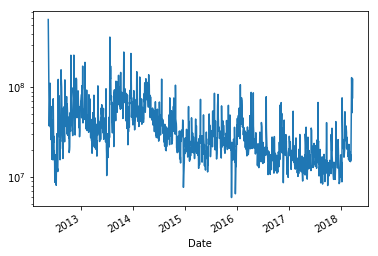

In [46]:
# Ideal to use logy plot in time series data 
facebook_df['Volume'].plot(logy=True);

str

In [ ]:
from sklearn.model_selection import train_test_split
X = 
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=0)